In [1]:
import pandas as pd
import openpyxl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids.xls", sheet_name = "Learner Data Template")

In [3]:
df.head(10)

,IP,REGION,DISTRICT,COMMUNITY/CLASS,TYPE OF OOSC,SEX,AGE,DROP OUT (YES/NO),WHICH QUARTER CHILD DROPPED,GRADUATED (YES/NO),...,Region,District,Type of OOSC,Sex,Age,Dropout,Quarter Drop,Graduated,Transition,Language
0,AfriKids,Upper East,Bongo,Abelinzanga,NaN,M,13.0,No,NaN,Yes,...,Ashanti,Atebubu,Never been to school,M,8.0,YES,1.0,YES,YES,Asante Twi
1,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,13.0,No,NaN,Yes,...,Brong Ahafo,Banda,Drop out,F,9.0,NO,2.0,NO,NO,Birfour
2,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,11.0,No,NaN,Yes,...,Northern,Bawku Municipal,NaN,NaN,10.0,NaN,3.0,NaN,NaN,Dagaare
3,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,12.0,No,NaN,Yes,...,Upper East,Bawku West,NaN,NaN,11.0,NaN,4.0,NaN,NaN,Dagbani
4,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,14.0,No,NaN,Yes,...,Upper West,Bole,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Ewe
5,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,13.0,No,NaN,Yes,...,NaN,Bongo,NaN,NaN,13.0,NaN,NaN,NaN,NaN,Gonja
6,AfriKids,Upper East,Bongo,Abelinzanga,NaN,M,14.0,No,NaN,Yes,...,NaN,Central Gonja,NaN,NaN,14.0,NaN,NaN,NaN,NaN,Gurene
7,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,12.0,No,NaN,Yes,...,NaN,Daffiama Bussie Issah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kasem
8,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,12.0,No,NaN,Yes,...,NaN,East Gonja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kusaal
9,AfriKids,Upper East,Bongo,Abelinzanga,NaN,F,14.0,No,NaN,Yes,...,NaN,Garu Tempane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likpalkpaaln


In [4]:
print(df.columns)


Index(['IP', 'REGION', 'DISTRICT', 'COMMUNITY/CLASS', 'TYPE OF OOSC', 'SEX',
       'AGE', 'DROP OUT (YES/NO)', 'WHICH QUARTER CHILD DROPPED',
       'GRADUATED (YES/NO)', 'TRANSITIONED (YES/NO)', 'SCHOOL TRANSITIONED',
       'CLASS PLACED IN', 'LANGUAGE', 'Unnamed: 14', 'Unnamed: 15', 'IP.1',
       'Region', 'District', 'Type of OOSC', 'Sex', 'Age', 'Dropout',
       'Quarter Drop', 'Graduated', 'Transition', 'Language'],
      dtype='object')


In [5]:
def categorize_age(age):
    if 6 <= age <= 8:
        return 'Lower Primary'
    elif 9 <= age <= 11:
        return 'Upper Primary'
    elif 12 <= age <= 14:
        return 'Junior High School'
    else:
        return 'Out of range'

# Apply the function to the AGE column and create a new column
df['School Level'] = df['AGE'].apply(categorize_age)

# Check the DataFrame to see the new column
print(df[['AGE', 'School Level']])


       AGE        School Level
0     13.0  Junior High School
1     13.0  Junior High School
2     11.0       Upper Primary
3     12.0  Junior High School
4     14.0  Junior High School
...    ...                 ...
1416   NaN        Out of range
1417   NaN        Out of range
1418   NaN        Out of range
1419   NaN        Out of range
1420   NaN        Out of range

[1421 rows x 2 columns]


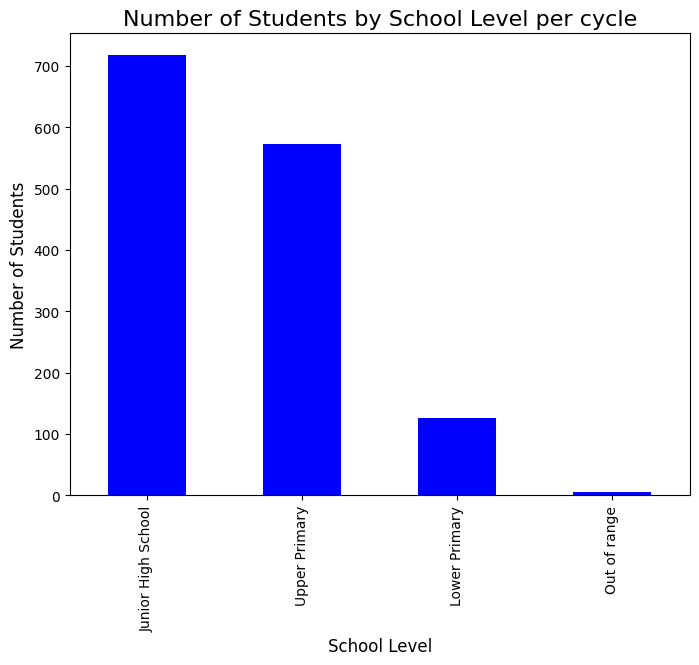

In [6]:
# Count the number of occurrences of each school level category
school_level_counts = df['School Level'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(8, 6))
school_level_counts.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Number of Students by School Level per cycle', fontsize=16)
plt.xlabel('School Level', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Show the plot
plt.show()

In [7]:
print(df['AGE'].describe())

count    1416.000000
mean       11.360169
std         1.946695
min         8.000000
25%        10.000000
50%        12.000000
75%        13.000000
max        14.000000
Name: AGE, dtype: float64


In [8]:
# Filter out 'Out of range' entries
df_filtered = df[df['School Level'] != 'Out of range']


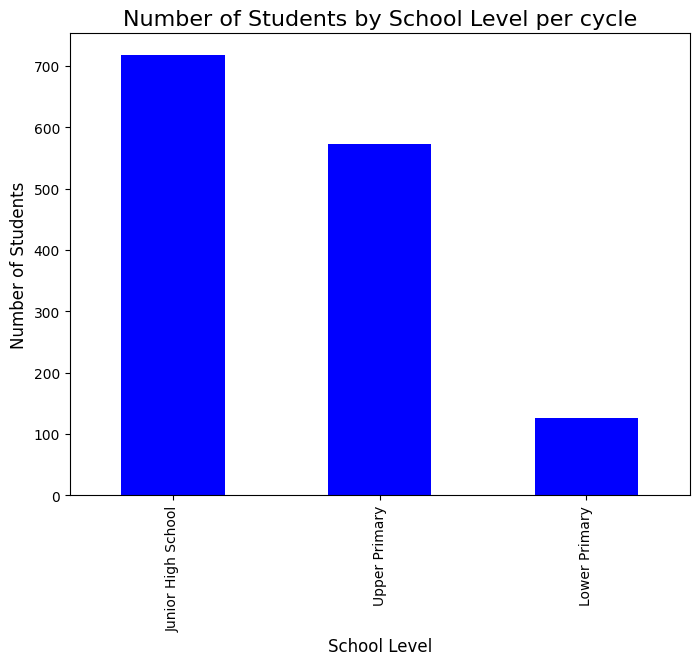

In [9]:
# Count the number of occurrences of each school level category in the filtered DataFrame
school_level_counts = df_filtered['School Level'].value_counts()

plt.figure(figsize=(8, 6))
school_level_counts.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Number of Students by School Level per cycle', fontsize=16)
plt.xlabel('School Level', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Show the plot
plt.show()


In [10]:
intervention = df['DROP OUT (YES/NO)']
print(intervention)

0        No
1        No
2        No
3        No
4        No
       ... 
1416    NaN
1417    NaN
1418    NaN
1419    NaN
1420    NaN
Name: DROP OUT (YES/NO), Length: 1421, dtype: object


In [11]:
# Get the unique/distinct values in the 'DROP OUT (YES/NO)' column
intervention = df['DROP OUT (YES/NO)'].unique()

# Print the unique values
print(intervention)


['No' 'Yes' 'YES' 'NO' nan]


In [12]:
# Standardize values in the 'DROP OUT (YES/NO)' column by converting to uppercase
df['DROP OUT (YES/NO)'] = df['DROP OUT (YES/NO)'].str.upper()

# Optionally, you can fill missing values (NaN) with a default value (e.g., 'UNKNOWN' or any other appropriate value)
df['DROP OUT (YES/NO)'] = df['DROP OUT (YES/NO)'].fillna('UNKNOWN')

# Check the unique values after cleaning
print(df['DROP OUT (YES/NO)'].unique())

# Standardize values in the 'GRADUATED (YES/NO)' column by converting to uppercase
df['GRADUATED (YES/NO)'] = df['GRADUATED (YES/NO)'].str.upper()

# Optionally, fill missing values (NaN) with a default value (e.g., 'UNKNOWN' or another appropriate value)
df['GRADUATED (YES/NO)'] = df['GRADUATED (YES/NO)'].fillna('UNKNOWN')

# Check the unique values after cleaning
print(df['GRADUATED (YES/NO)'].unique())



['NO' 'YES' 'UNKNOWN']
['YES' 'NO' 'UNKNOWN']


In [13]:
# Evaluating the CBE intervention
dropout_counts = df['DROP OUT (YES/NO)'].value_counts()

# Ensure both 'YES' and 'NO' exist in the counts
if 'YES' in dropout_counts and 'NO' in dropout_counts:
    dropout_ratio = dropout_counts['YES'] / dropout_counts['NO']
    print(f"Ratio of 'YES' to 'NO': {dropout_ratio}")
else:
    print("Either 'YES' or 'NO' values are missing in the data.")


Ratio of 'YES' to 'NO': 0.14470493128536782


In [14]:
# Count the number of 'YES' and 'NO' in the 'GRADUATED (YES/NO)' column
graduation_count = df['GRADUATED (YES/NO)'].value_counts()

# Calculate the total number of students
total_students = graduation_count['YES'] + graduation_count['NO']

# Calculate the percentage of 'YES' (graduated) students
graduated_percentage = (graduation_count['YES'] / total_students) * 100

# Calculate the percentage of 'NO' (not graduated) students
not_graduated_percentage = (graduation_count['NO'] / total_students) * 100

# Print the percentages
print(f"Percentage of students who graduated (YES): {graduated_percentage:.2f}%")
print(f"Percentage of students who did not graduate (NO): {not_graduated_percentage:.2f}%")


Percentage of students who graduated (YES): 84.39%
Percentage of students who did not graduate (NO): 15.61%


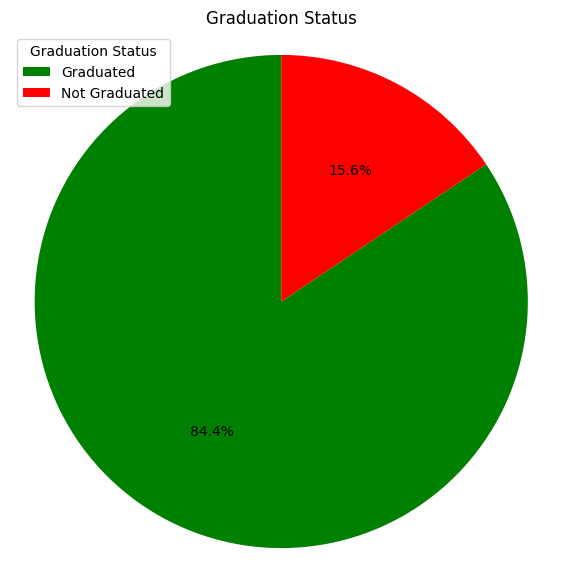

In [18]:
# Data for pie chart
labels = ['Graduated', 'Not Graduated']
sizes = [graduated_percentage, not_graduated_percentage]
colors = ['green', 'red']

# Create a pie chart without labels
plt.figure(figsize=(7, 7))  # Set the figure size
patches, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a legend (without labels on the pie slices)
plt.legend(patches, labels, title="Graduation Status", loc="best")

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Graduation Status')

# Show the plot
plt.show()